# PyPEEC within Jupyter Notebook

---

Run the **PyPEEC tutorial** and/or examples within a **Jupyter notebook**:
* Matplotlib and PyVista are used for the 2D and 3D plots.
* IPyWidgets, Trame, and ipympl are used for the rendering.

---

**Thomas Guillod - Dartmouth College**

Mozilla Public License Version 2.0

---

## Setup

In [1]:
# import modules
import os.path
import scisave
import pypeec

# plot mode for jupyter
plot_mode = "nb"

# name of the configuration folder
folder_config = "config"

# name of the different examples
#   tutorial
#   examples_voxel
#       examples_voxel/slab
#       examples_voxel/core
#       examples_voxel/transformer
#       examples_voxel/anisotropic
#       examples_voxel/distributed
#       examples_voxel/logo
#   examples_shape
#       examples_shape/coplanar
#       examples_shape/parallel
#       examples_shape/busbar
#       examples_shape/wire
#       examples_shape/hole
#       examples_shape/pwm
#   examples_stl
#       examples_stl/inductor_air
#       examples_stl/inductor_core
#       examples_stl/inductor_toroid
#       examples_stl/transformer_air
#       examples_stl/transformer_core
#   examples_png
#       examples_png/inductor_spiral
#       examples_png/inductor_gap
#       examples_png/inductor_pot
#       examples_png/iron_core
#       examples_png/shield
#       examples_png/gerber

# name of the selected example
folder_example = "tutorial"

# get the example filenames
folder_out = os.path.join(folder_example)
file_geometry = os.path.join(folder_example, "geometry.yaml")
file_problem = os.path.join(folder_example, "problem.yaml")
file_voxel = os.path.join(folder_example, "voxel.json.gz")
file_solution = os.path.join(folder_example, "solution.json.gz")

# get the configuration filenames
file_tolerance = os.path.join(folder_config, "tolerance.yaml")
file_viewer = os.path.join(folder_config, "viewer.yaml")
file_plotter = os.path.join(folder_config, "plotter.yaml")

# check the output folder and input files
assert os.path.isdir(folder_out), "output folder does not exist"
assert os.path.isfile(file_geometry), "geometry file is not found"
assert os.path.isfile(file_problem), "problem file is not found"
assert os.path.isfile(file_tolerance), "tolerance file is not found"
assert os.path.isfile(file_viewer), "viewer file is not found"
assert os.path.isfile(file_plotter), "plotter file is not found"

## Run the Mesher

In [ ]:
# run the mesher
pypeec.run_mesher_file(
    file_geometry=file_geometry,
    file_voxel=file_voxel,
)

# load the results
data_voxel = scisave.load_data(file_voxel)

## Run the Viewer

00:00:00.90 : pypeec   : info     : load the input data : start
00:00:00.97 : pypeec   : info     : load the input data : done
00:00:00.97 : pypeec   : info     : load the viewer
00:00:03.24 : pypeec   : info     : run the viewer
00:00:03.24 : pypeec   : info     : check the input data
00:00:03.25 : pypeec   : info     : init the plot manager
00:00:03.34 : pypeec   : info     : parse data
00:00:03.47 : pypeec   : info     : generate plots
00:00:03.47 : pypeec   : info     :     plot / domain
00:00:03.87 : pypeec   : info     :     plot / voxelization
00:00:03.94 : pypeec   : info     :     plot / adjacent
00:00:04.04 : pypeec   : debug    : plot statistics
00:00:04.04 : pypeec   : debug    :     number of 3D plots = 2
00:00:04.04 : pypeec   : debug    :     number of 2D plots = 1
00:00:04.04 : pypeec   : debug    :     number of VTK datasets = 4
00:00:04.05 : pypeec   : debug    : display notebook plots
00:00:04.05 : pypeec   : debug    :     show / domain


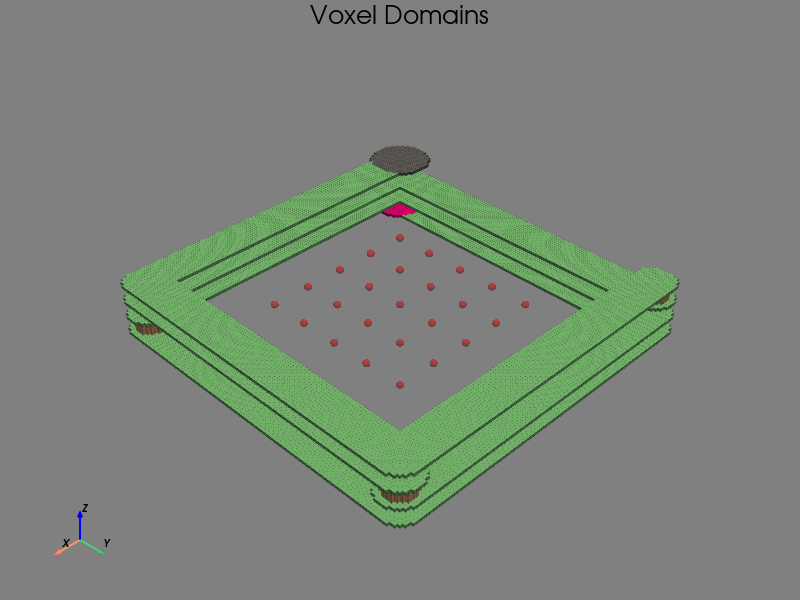

00:00:04.50 : pypeec   : debug    :     show / voxelization


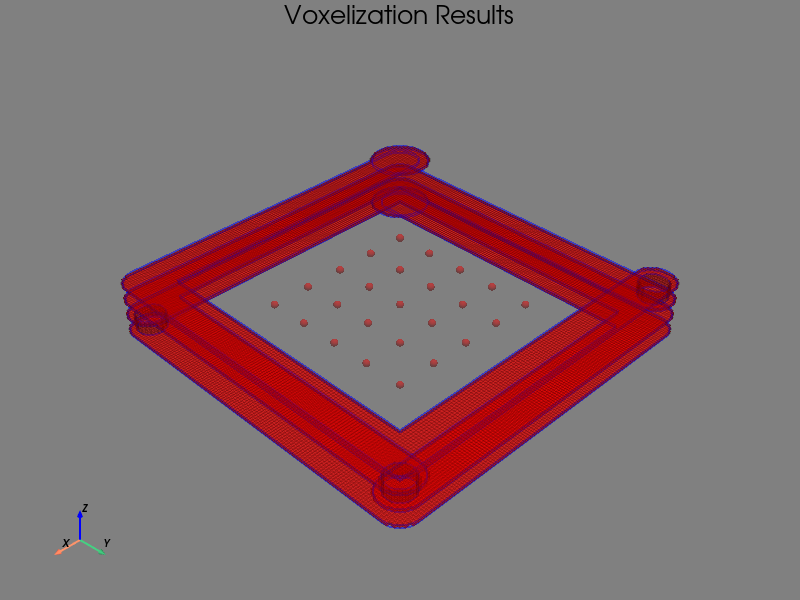

00:00:04.79 : pypeec   : debug    :     show / adjacent


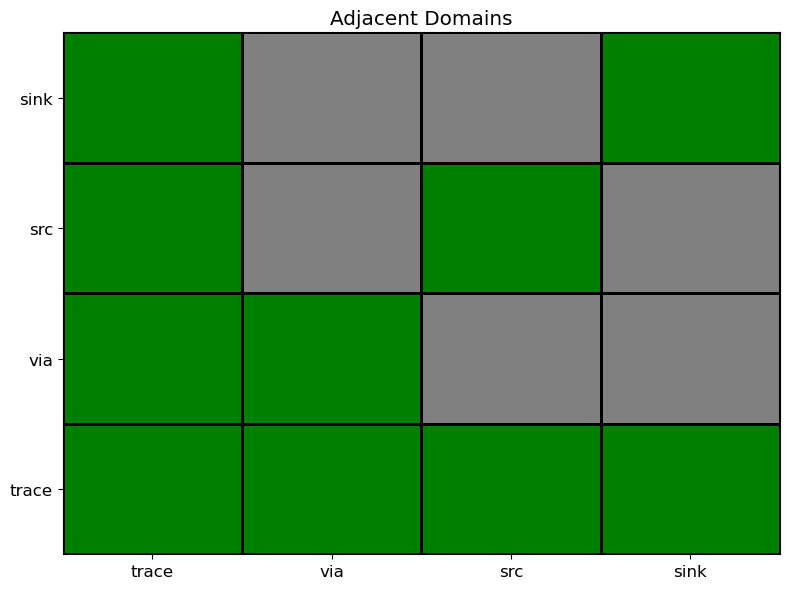

00:00:04.91 : pypeec   : debug    : exit plotting routine
00:00:04.91 : pypeec   : info     : successful viewer termination


In [2]:
# list of plots to be displayed
tag_plot = ["domain", "voxelization", "adjacent"]

# run the viewer
pypeec.run_viewer_file(
    file_voxel=file_voxel,
    file_viewer=file_viewer,
    tag_plot=tag_plot,
    plot_mode=plot_mode,
)

## Run the Solver

In [ ]:
# run the solver
pypeec.run_solver_file(
    file_voxel=file_voxel,
    file_problem=file_problem,
    file_tolerance=file_tolerance,
    file_solution=file_solution,
)

# load the results
data_solution = scisave.load_data(file_solution)

## Run the Plotter

In [ ]:
# list of plots to be displayed
tag_plot = ["V_c_norm", "J_c_norm", "H_p_norm", "residuum"]

# run the plotter
pypeec.run_plotter_file(
    file_solution=file_solution,
    file_plotter=file_plotter,
    tag_plot=tag_plot,
    plot_mode=plot_mode,
)